In [73]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import scipy.stats as st
import random
import seaborn as sns
import scikit_posthocs as sp
from cmh import CMH
from scipy.stats import t
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.regression import mixed_linear_model
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.preprocessing import LabelEncoder
import lifelines
from lifelines.statistics import logrank_test

Задание 1

In [ ]:
task_1 = pd.read_csv('Task_1_module3.csv')
task_1.head(5)

In [ ]:
len(task_1)

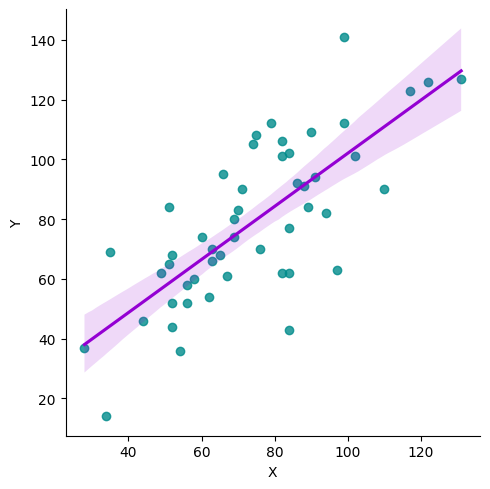

In [43]:
sns.lmplot(x='X', y='Y', data=task_1, 
           scatter_kws={'color': "darkcyan"}, 
           line_kws={'color': 'darkviolet'})

<AxesSubplot: >

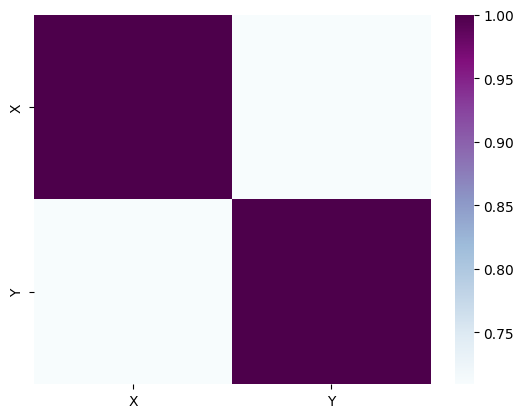

In [45]:
sns.heatmap(task_1.corr(method='spearman'), cmap="BuPu")

In [14]:
r_p_stats, p_value_stats = spearmanr(task_1['X'], task_1['Y'])
print("Коэффициент корреляции Спирмана:", 
      round(r_p_stats, 4))
print("p-value:", 
      p_value_stats)

Коэффициент корреляции Спирмана: 0.7091
p-value: 8.224114969485772e-09


Вывод:
> 1. Величины X и Y имеют высокую положительную корреляцию. 
> 2. Полученная p-value меньше установленного уровня значимости 5%, поэтому мы можем отвергнуть нулевую гипотезу о том, что наблюдаемая связь была получена случайным образом (корреляция равна нулю). Таким образом полученная высокая положительная связь между переменными имеет неслучайный характер (связь статистически значима). Данные коррелированы.

Задание 2 

In [22]:
task_2 = pd.read_csv('Task_2_module3.csv')
task_2.head(5)

,Субъект №,Группа,Пол,Образование,Возраст,Доход
0,0,Группа 1,Женский,Среднее,51,30000
1,1,Группа 2,Мужской,Учёная степень,40,70000
2,2,Группа 2,Женский,Высшее,40,70000
3,3,Группа 2,Женский,Среднее,31,70000
4,4,Группа 2,Женский,Среднее,42,70000


In [23]:
len(task_2)

120

Normality test p-value 0.01139


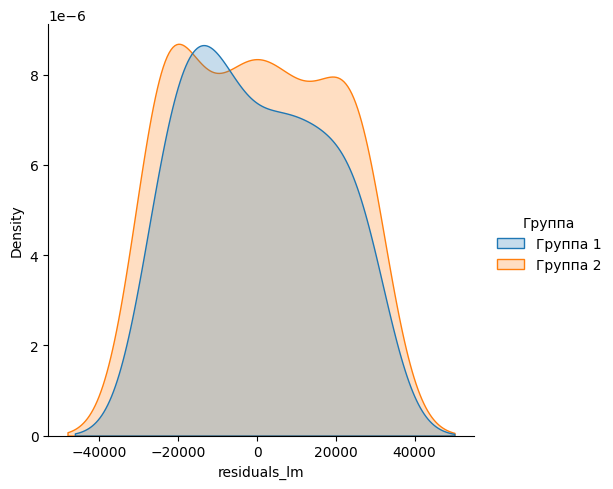

In [46]:
lm = ols('Доход ~ Группа', task_2).fit()
exmpl_data = task_2.assign(residuals_lm=lm.resid)

print("Normality test p-value %.5f" % sms.jarque_bera(lm.resid)[1])

ax = sns.displot(exmpl_data, x='residuals_lm', kind="kde", hue='Группа', fill=True)

Normality test p-value 0.01104


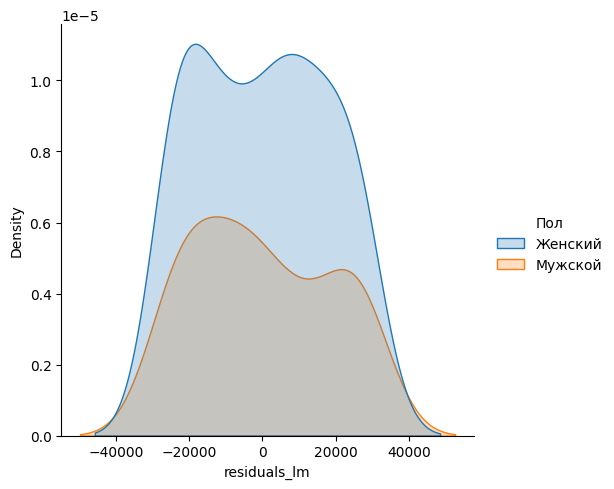

In [47]:
lm = ols('Доход ~ Пол', task_2).fit()
exmpl_data = task_2.assign(residuals_lm=lm.resid)

print("Normality test p-value %.5f" % sms.jarque_bera(lm.resid)[1])

ax = sns.displot(exmpl_data, x='residuals_lm', kind="kde", hue='Пол', fill=True)

Normality test p-value 0.01108


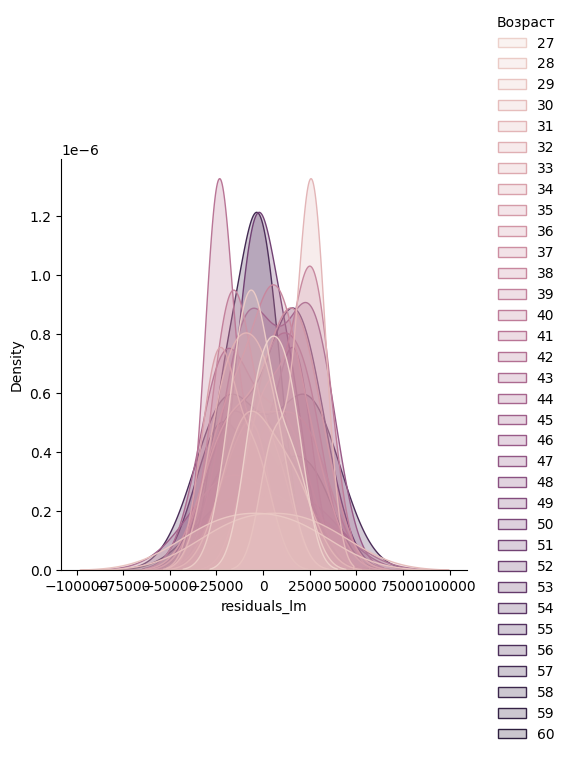

In [48]:
lm = ols('Доход ~ Возраст', task_2).fit()
exmpl_data = task_2.assign(residuals_lm=lm.resid)

print("Normality test p-value %.5f" % sms.jarque_bera(lm.resid)[1])

ax = sns.displot(exmpl_data, x='residuals_lm', kind="kde", hue='Возраст', fill=True)

Normality test p-value 0.01145


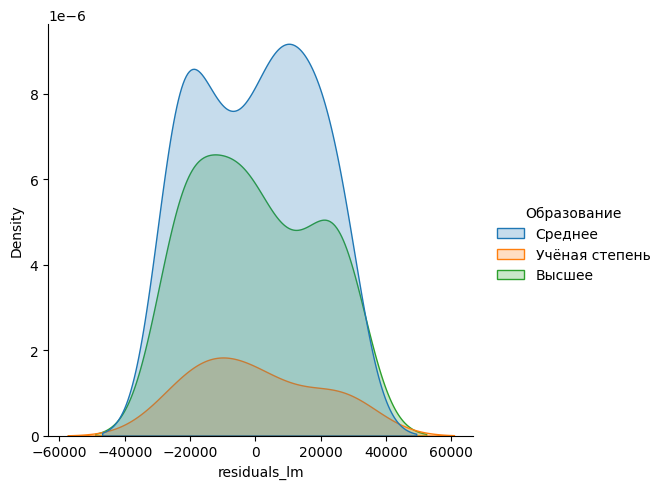

In [49]:
lm = ols('Доход ~ Образование', task_2).fit()
exmpl_data = task_2.assign(residuals_lm=lm.resid)

print("Normality test p-value %.5f" % sms.jarque_bera(lm.resid)[1])

ax = sns.displot(exmpl_data, x='residuals_lm', kind="kde", hue='Образование', fill=True)

In [52]:
lm = ols('Доход ~ Образование + Пол + Группа + Возраст', task_2).fit()
exmpl_data = task_2.assign(residuals_lm=lm.resid)

print("Normality test p-value %.5f" % sms.jarque_bera(lm.resid)[1])


Normality test p-value 0.01167


In [53]:
model2 = ols("Доход ~ Возраст + C(Пол) + C(Образование) + C(Группа)", data = exmpl_data)
fitted_model2 = model2.fit()
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Доход   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.042
Method:                 Least Squares   F-statistic:                   0.04167
Date:                Sat, 25 Mar 2023   Prob (F-statistic):              0.999
Time:                        17:58:02   Log-Likelihood:                -1344.5
No. Observations:                 120   AIC:                             2701.
Df Residuals:                     114   BIC:                             2718.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         4.533e+04   8341.180      5.435      0.000    2.88e+04    6.19e+04
C(Пол)[T.Мужской]                  102.4888   3552.952      0.029      0.977   -6935.883    7140.860
C(Образование)[T.Среднее]          570.5092   3567.790      0.160      0.873   -6497.255    7638.274
C(Образование)[T.Учёная степень]   276.7898   6047.750      0.046      0.964   -1.17e+04    1.23e+04
C(Группа)[T.Группа 2]              939.7155   3356.811      0.280      0.780   -5710.101    7589.532
Возраст                            -60.1150    178.984     -0.336      0.738    -414.682     294.452
==============================================================================
Omnibus:                       82.656   Durbin-Watson:                   1.697
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.902
Skew:                           0.105   Prob(JB):                       0.0117
Kurtosis:                       1.682   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
print(fitted_model2.params[0])

45332.26891089598


In [55]:
LMM_model3 = mixed_linear_model.MixedLM.from_formula(formula="Доход ~ 1 + Возраст + C(Пол) + C(Образование)", 
                 groups="Группа", 
                 re_formula="1 + Возраст + C(Пол) + C(Образование)", 
                 vc_formula={'Группа': '0+C(Группа)'},
                 data=task_2)
LMM_model3_fit = LMM_model3.fit()
print('Отчёт о построении модели LMM')
LMM_model3_fit.summary()

Отчёт о построении модели LMM


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                              Mixed Linear Model Regression Results
=================================================================================================================================
Model:                                   MixedLM                        Dependent Variable:                        Доход         
No. Observations:                        120                            Method:                                    REML          
No. Groups:                              2                              Scale:                                     326461659.7630
Min. group size:                         55                             Log-Likelihood:                            -1305.2305    
Max. group size:                         65                             Converged:                                 No            
Mean group size:                         60.0                                                                                    
---------------------------------------------------------------------------------------------------------------------------------
                                                                     Coef.         Std.Err.       z    P>|z|   [0.025     0.975] 
---------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            46013.001        13585.097  3.387 0.001  19386.700 72639.301
C(Пол)[T.Мужской]                                                      142.728         3618.623  0.039 0.969  -6949.642  7235.099
C(Образование)[T.Среднее]                                              434.566         4272.057  0.102 0.919  -7938.511  8807.644
C(Образование)[T.Учёная степень]                                        44.958         6380.072  0.007 0.994 -12459.754 12549.669
Возраст                                                                -63.505          509.247 -0.125 0.901  -1061.611   934.601
Группа Var                                                       116831038.043 178779230462.522                                  
Группа x C(Пол)[T.Мужской] Cov                                     1329418.215                                                   
C(Пол)[T.Мужской] Var                                               699753.366                                                   
Группа x C(Образование)[T.Среднее] Cov                           -14196264.843         5570.855                                  
C(Пол)[T.Мужской] x C(Образование)[T.Среднее] Cov                  -698965.791         1366.691                                  
C(Образование)[T.Среднее] Var                                     10585922.681         2380.329                                  
Группа x C(Образование)[T.Учёная степень] Cov                      3166715.680                                                   
C(Пол)[T.Мужской] x C(Образование)[T.Учёная степень] Cov            -64442.220                                                   
C(Образование)[T.Среднее] x C(Образование)[T.Учёная степень] Cov   -212929.662         2013.527                                  
C(Образование)[T.Учёная степень] Var                               8427674.128                                                   
Группа x Возраст Cov                                               -891521.996                                                   
C(Пол)[T.Мужской] x Возраст Cov                                     -19465.708                                                   
C(Образование)[T.Среднее] x Возраст Cov                             198579.971          206.647                                  
C(Образование)[T.Учёная степень] x Возраст Cov                      -87200.701                                                   
Возраст Var                                                         452968.181                   

In [61]:
print('Значение интерсепта:', LMM_model3_fit.fe_params.loc['Intercept'])

Значение интерсепта: 46013.00078279993


Интерсепт по 2 модели равен 45332.3
	
Интерсепт по модели LMM равен 46013.0

Задание 3 Протестируйте гипотезу на основании только что полученной модели:
средний доход при среднем образовании = среднем доход при ученой степени
Вы принимаете или отклоняете нулевую гипотезу? Почему?

In [66]:
task_2.head(5)

,Субъект №,Группа,Пол,Образование,Возраст,Доход
0,0,Группа 1,Женский,Среднее,51,30000
1,1,Группа 2,Мужской,Учёная степень,40,70000
2,2,Группа 2,Женский,Высшее,40,70000
3,3,Группа 2,Женский,Среднее,31,70000
4,4,Группа 2,Женский,Среднее,42,70000


In [194]:
middle_ed = task_2[task_2['Образование']=='Среднее']
middle_ed.head(5)

,Субъект №,Группа,Пол,Образование,Возраст,Доход
0,0,Группа 1,Женский,Среднее,51,30000
3,3,Группа 2,Женский,Среднее,31,70000
4,4,Группа 2,Женский,Среднее,42,70000
7,7,Группа 1,Женский,Среднее,39,50000
8,8,Группа 1,Мужской,Среднее,43,20000


In [196]:
print(len(middle_ed))

63


In [195]:
phd = task_2[task_2['Образование']=='Учёная степень']
phd.head(5)

,Субъект №,Группа,Пол,Образование,Возраст,Доход
1,1,Группа 2,Мужской,Учёная степень,40,70000
6,6,Группа 1,Мужской,Учёная степень,39,30000
12,12,Группа 1,Женский,Учёная степень,48,40000
17,17,Группа 1,Мужской,Учёная степень,43,20000
24,24,Группа 1,Мужской,Учёная степень,49,70000


In [197]:
print(len(phd))

12


Задание 4

In [ ]:
task_4 = pd.read_csv('Task_4_module3.csv', sep=';')
task_4.head(5)

In [8]:
len(task_4)

160

In [158]:
task4_melt = pd.melt(task_4, id_vars=["Субъект №", "Пол", 'Образование'],
                     value_vars=['Доход месяц 1', 'Доход месяц 2', "Доход месяц 3", 
                                 'Доход месяц 4', 'Доход месяц 5', "Доход месяц 6"], 
                    var_name='Месяц',
                    value_name="Доход")

df_melted = task4_melt[['Субъект №', "Пол", "Доход", "Месяц"]]
df_melted['Месяц'] = df_melted['Месяц'].str.replace('Доход месяц ', '').astype(int)
df_melted

,Субъект №,Пол,Доход,Месяц
0,1,Мужской,40000.0,1
1,2,Мужской,30000.0,1
2,3,Мужской,40000.0,1
3,4,Мужской,30000.0,1
4,5,Женский,40000.0,1
...,...,...,...,...
955,156,Мужской,40000.0,6
956,157,Мужской,40000.0,6
957,158,Женский,20000.0,6
958,159,Женский,30000.0,6


In [160]:
le = LabelEncoder()
df_melted['Пол'] = pd.DataFrame({'Пол': le.fit_transform(df_melted['Пол'])})

df_melted.head(5)

,Субъект №,Пол,Доход,Месяц
0,1,1,40000.0,1
1,2,1,30000.0,1
2,3,1,40000.0,1
3,4,1,30000.0,1
4,5,0,40000.0,1


In [164]:
y = df_melted.dropna()['Доход'].values 
ID = df_melted.dropna()['Субъект №'].values
X = df_melted.dropna()[['Пол', 'Месяц']].values

In [165]:
model = sm.MixedLM(y, X, groups=ID)
result_MMRM = model.fit()

In [190]:
new_data = df_melted.copy()
dfnew = pd.DataFrame({'Предикт доход':
    result_MMRM.predict(new_data.loc[new_data['Доход'].isnull(), ['Пол','Месяц']]).round()})
dfnew.head()

df_to_replace = df_melted.loc[df_melted.index.isin(dfnew.index)]

final = df_to_replace.merge(dfnew, left_index=True, right_index=True)[['Субъект №', 'Месяц', 'Предикт доход']]
final


,Субъект №,Месяц,Предикт доход
5,6,1,3601.0
13,14,1,3601.0
27,28,1,27784.0
39,40,1,3601.0
47,48,1,27784.0
55,56,1,27784.0
60,61,1,3601.0
94,95,1,3601.0
143,144,1,27784.0
152,153,1,3601.0
